# 회귀_종합실습1_carseat

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비

In [4]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [5]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [8]:
nfeatures = x_train.shape[1]
nfeatures

18

In [11]:
clear_session()

In [12]:
model = Sequential([Input(shape = (nfeatures, )),
                    Dense(1)])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              19 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [14]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

In [15]:
result = model.fit(x_train, y_train, epochs = 50, validation_split = .2).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 50.2802 - val_loss: 14.8692
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.5702 - val_loss: 12.9962
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.5323 - val_loss: 14.3623
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3951 - val_loss: 9.8482
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4983 - val_loss: 8.3662
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3192 - val_loss: 7.9472
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7550 - val_loss: 8.2976
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8453 - val_loss: 8.2504
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1713 - val_loss: 7.4817
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.1419 - val_loss: 7.2314
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7137 - val_loss: 7.3733
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1946 - val_loss: 7.2975
Epoch

* 학습곡선

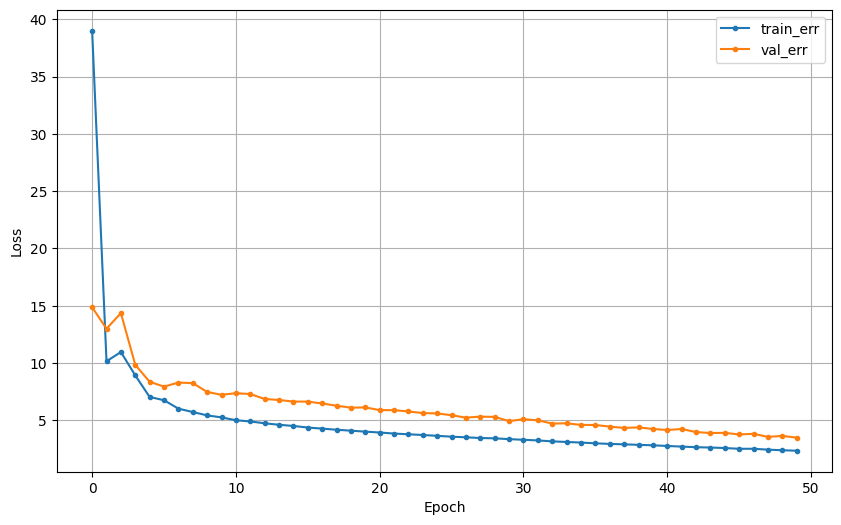

In [16]:
dl_history_plot(result)

* 검증

In [31]:
y_pred = model.predict(x_val)
mean_absolute_error(y_val, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


1.4868233220577238

### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [21]:
clear_session()

In [22]:
model2 = Sequential([Input(shape = (nfeatures, )),
                     Dense(8, activation = 'relu'),
                     Dense(1)])

In [23]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [24]:
model2.compile(optimizer = Adam(learning_rate = .2), loss = 'mse')

In [25]:
result2 = model2.fit(x_train, y_train, epochs = 50, validation_split = .2).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 27.8202 - val_loss: 10.4263
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0860 - val_loss: 13.4432
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2042 - val_loss: 7.4537
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4862 - val_loss: 7.9474
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3295 - val_loss: 7.0458
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2402 - val_loss: 6.3808
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9572 - val_loss: 5.6883
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1203 - val_loss: 5.2232
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6108 - val_loss: 4.9612
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7633 - val_loss: 4.7473
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6457 - val_loss: 4.5469
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9031 - val_loss: 3.8739
Epoch 13

* 학습곡선

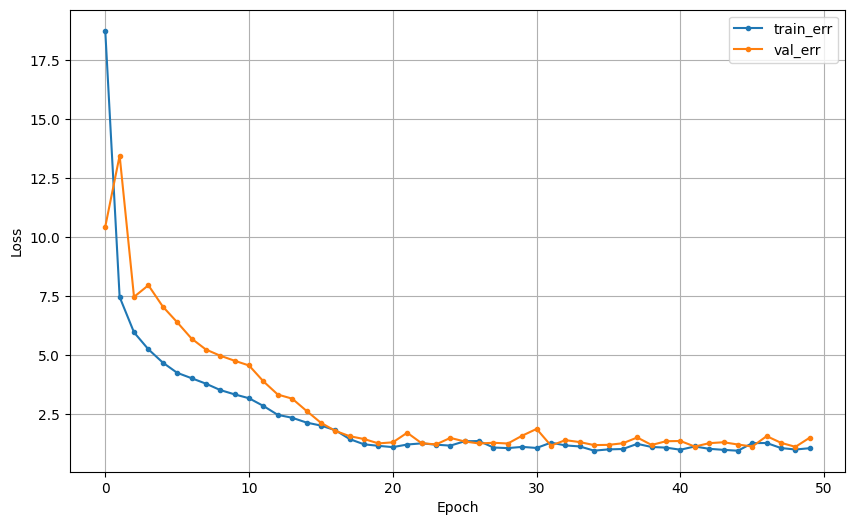

In [26]:
dl_history_plot(result2)

* 검증

In [30]:
pred = model2.predict(x_val)
mean_absolute_percentage_error(y_val, pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


108997820966502.64

## 4.추가 실험1

* Hidden Layer 1개
    * 노드 : 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150
* 모델링 코드를 함수로 생성
    * 입력 : 노드 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [ ]:
def modeling_test1(node) :

    # 노드 수를 입력 받아 모델 선언
    clear_session()
    model = Sequential([Input(shape = (nfeatures,)),
                        Dense(node, activation = 'relu' ),
                        Dense(1) ] )

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    # mae 결과 return
    return mae

### (2) 반복실행

In [ ]:
from tqdm import tqdm

In [ ]:
nodes = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
result = []
for n in tqdm(nodes) :
    result.append(modeling_test1(n))

In [ ]:
plt.plot(nodes, result, marker = 'o')
plt.grid()
plt.show()

## 5.추가 실험2

* Hidden Layer 수 : 1,2,3,4,5,6,7,8,9,10
    * 각 레이어의 노드 수 : 10개
* 함수 생성
    * 입력 : 레이어 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [ ]:
def modeling_test2(layer) :

    # 레이어 리스트 만들기
    # 레이어 수 만큼 리스트에 레이어 추가

    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Input(shape = (nfeatures,)), Dense(10, activation = 'relu' )]

    # 주어진 레이어 수에 맞게 레이어 추가
    for i in range(2, layer) :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(10 , activation = 'relu' ))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(1))
    model = Sequential(layer_list)

    # 레이어 잘 추가된 건지 확인하기 위해 summary 출력
    print(model.summary())

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    return mae


### (2) 반복실행

In [ ]:
layers = list(range(1,11))
result = []
for l in tqdm(layers) :
    result.append(modeling_test2(l))

In [ ]:
plt.plot(layers, result)
plt.grid()
plt.show()